In [4]:
import json
from move_ups import *
import matplotlib.pyplot as plt

# Loading an example input json

In [2]:
with open('example_input.json', 'r') as fp:
    data = json.load(fp)

100%|██████████| 12/12 [00:00<00:00, 32.11it/s]


# Running the model

In [6]:
model = move_up_model(data, fdid='76000', state='VA')

100%|██████████| 12/12 [00:00<00:00, 32.06it/s]


# Displaying output json
Note, it also saved this as a json file 'example_output.json'

In [7]:
model.output

{'current': {'metrics': {}, 'percentage_under_4_minute_travel': 74.7},
 'move_up': {'strategy': 'maximize fraction of incidents within 4 minute travel time',
  'metrics': {'percentage_under_4_minute_travel': 86.4},
  'moves': [{'unit_id': 'E14', 'station': 16},
   {'unit_id': 'E8', 'station': 17},
   {'unit_id': 'E25', 'station': 23},
   {'unit_id': 'E19', 'station': 20},
   {'unit_id': 'E6', 'station': 5}]}}

# Showing the movement plot
The exponent refers to the exponent in the distance function. If exponent is 1,
then the model simply minimizes the total distance traveled. If exponent is 2, it will minimize the total
distance^2 traveled. Raising the exponent penalizes units traveling long distances, but can favor more movements

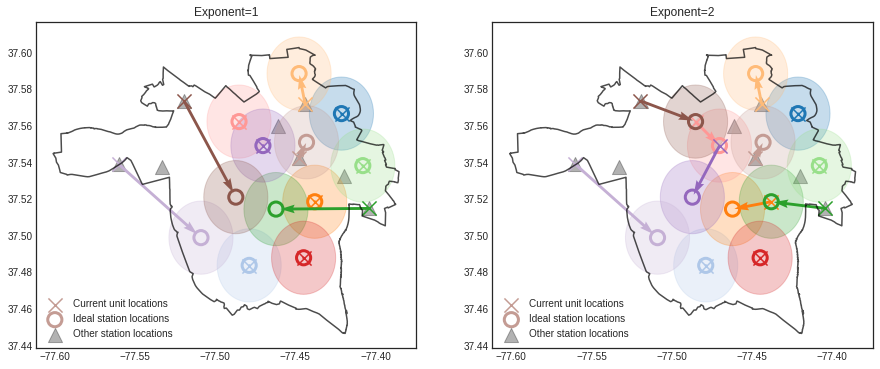

In [8]:
plt.style.use('seaborn-white')
cmap = plt.cm.tab20
colors = cmap(np.linspace(0,1,20))
plt.rcParams['figure.figsize'] = 15,6
for idx in range(2):
    plt.subplot(1,2,idx+1)
    model.balanced_assignment( exponent=idx+1)
    plt.plot(*model.boundary[0].exterior.xy, color='k', alpha=.7)
    for i,rec in enumerate(model.movement_rec):
        plot_list = np.zeros([2,2])
        plot_list[0,:] = model.unit_locs[model.unit_list.index(rec['unit'])]
        plot_list[1,:] = model.station_locs[model.station_list.index(rec['station'])]
        

        line1=plt.scatter(*plot_list[0,:], color=colors[i], marker='x',s=200, alpha=1, linewidths=3,zorder=1 )
        line2=plt.scatter(*plot_list[1,:], edgecolors=colors[i], marker='o', s=200, alpha=1,facecolors='none',linewidths=3,zorder=1 )

#         plt.legend(['Current unit locations', 'Locations of ideal stations'])
        length = np.sqrt(np.sum((plot_list[1,:]-plot_list[0,:])**2))
        plt.quiver(*plot_list[0,:], *(plot_list[1,:]-plot_list[0,:]), color=colors[i], angles='xy', scale_units='xy', scale = 1.05, zorder=1)
        plt.fill(*model.station_coverage_polys[rec['station']].exterior.xy, color=colors[i], alpha=0.25, zorder=0)
        plt.title('Exponent='+str(idx+1))
        
    stations = [i['station'] for i in model.movement_rec]
    not_included = [i for i in model.station_list if i not in stations]
    for i in not_included:
        line3=plt.scatter(model.station_locs[model.station_list.index(i)][0],model.station_locs[model.station_list.index(i)][1], color='k', marker='^', s=200, alpha=.3,zorder=0)
        
    plt.legend([line1,line2,line3], ['Current unit locations', 'Ideal station locations', 'Other station locations'])
    